# Analyzing the average frequencies between a population with congestive heart failure and a non filtered population


In [237]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from collections import defaultdict

# Settings
from IPython.core.display import display
plt.figure(figsize=(12,6), facecolor='white')
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['figure.facecolor'] = 'white'

<Figure size 864x432 with 0 Axes>

### Importing the two different sets of data

In [238]:
# Get patient data
# Patients only with Congestive Heart Failure
onlychf_data = []
for file in glob.glob('fhir/onlychf/*'):
    onlychf_data.append(pd.read_json(file))
#Non Filtered Patients
general_data = []
for file in glob.glob('fhir/general/*'):
    general_data.append(pd.read_json(file))

## Recording the frequency of certain resources

,Resources,CHF Mean,GEN Mean
0,Observation,346.921569,149.866667
1,Claim,142.803922,65.857143
2,Encounter,80.294118,40.180952
3,ExplanationOfBenefit,80.294118,40.180952
4,MedicationRequest,62.509804,25.676190
5,DiagnosticReport,29.254902,9.590476
6,Procedure,25.019608,26.800000
7,Immunization,10.960784,13.647619
8,Condition,9.549020,6.542857
9,Goal,6.960784,2.104762


,Encounters,CHF Mean,GEN Mean
0,General examination of patient (procedure)|162...,25.117647,11.876190
1,Encounter for check up (procedure)|185349003,11.627451,2.876190
2,Encounter for problem (procedure)|185347001,9.725490,1.009524
3,Urgent care clinic (procedure)|702927004,9.666667,1.638095
4,Encounter for problem|185347001,4.137255,1.038095
5,Encounter for symptom|185345009,3.019608,3.295238
6,Telemedicine consultation with patient|448337001,3.000000,NaN
7,Follow-up encounter|390906007,2.019608,1.523810
8,Encounter Inpatient|183452005,1.980392,0.276190
9,Encounter for 'check-up'|185349003,1.529412,0.828571


,Medications,CHF Mean,GEN Mean
0,amLODIPine 5 MG / Hydrochlorothiazide 12.5 MG ...,15.980392,1.114286
1,"insulin human, isophane 70 UNT/ML / Regular In...",13.039216,2.076190
2,Hydrochlorothiazide 25 MG Oral Tablet|310798,6.960784,4.952381
3,1 ML Epoetin Alfa 4000 UNT/ML Injection [Epoge...,4.980392,NaN
4,Atenolol 50 MG / Chlorthalidone 25 MG Oral Tab...,3.607843,3.304762
...,...,...,...
96,predniSONE 5 MG Oral Tablet|312617,NaN,0.009524
97,"cycloSPORINE, modified 100 MG Oral Capsule|241834",NaN,0.009524
98,Atropine Sulfate 1 MG/ML Injectable Solution|1...,NaN,0.009524
99,3 ML Amiodarone hydrocholoride 50 MG/ML Prefil...,NaN,0.009524


,Observations,CHF Mean,GEN Mean
0,Pain severity - 0-10 verbal numeric rating [Sc...,20.941176,10.571429
1,Blood Pressure|85354-9,17.058824,10.342857
2,Carbon Dioxide|20565-8,15.372549,4.000000
3,Chloride|2069-3,15.372549,4.000000
4,Potassium|6298-4,15.372549,4.000000
...,...,...,...
112,Percentage area affected by eczema Trunk|66529-9,NaN,0.009524
113,Percentage area affected by eczema Upper extre...,NaN,0.009524
114,Percentage area affected by eczema Lower extre...,NaN,0.009524
115,Cause of Death [US Standard Certificate of Dea...,NaN,0.009524


,Immunizations,CHF Mean,GEN Mean
0,"Influenza, seasonal, injectable, preservative ...",9.705882,8.247619
1,Td (adult) preservative free|113,0.764706,0.733333
2,"pneumococcal polysaccharide vaccine, 23 valent|33",0.215686,0.123810
3,zoster|121,0.156863,0.180952
4,Pneumococcal conjugate PCV 13|133,0.098039,0.600000
5,"Hep A, adult|52",0.019608,0.228571
6,DTaP|20,NaN,0.476190
7,"HPV, quadrivalent|62",NaN,0.457143
8,meningococcal MCV4P|114,NaN,0.447619
9,IPV|10,NaN,0.361905


,Conditions,CHF Mean,GEN Mean
0,Chronic congestive heart failure (disorder)|88...,1.000000,0.019048
1,Viral sinusitis (disorder)|444814009,0.941176,1.057143
2,Acute viral pharyngitis (disorder)|195662009,0.627451,0.666667
3,Anemia (disorder)|271737000,0.549020,0.295238
4,Prediabetes|15777000,0.490196,0.276190
...,...,...,...
100,Acute allergic reaction|241929008,NaN,0.009524
101,Contact dermatitis|40275004,NaN,0.009524
102,Hyperglycemia (disorder)|80394007,NaN,0.009524
103,Fracture of rib|33737001,NaN,0.009524


,Procedures,CHF Mean,GEN Mean
0,Medication Reconciliation (procedure)|430193006,6.764706,4.771429
1,Renal dialysis (procedure)|265764009,4.980392,NaN
2,Transthoracic three dimensional ultrasonograph...,1.921569,0.038095
3,Plain chest X-ray (procedure)|399208008,1.450980,0.028571
4,Plain chest X-ray|399208008,1.294118,0.019048
...,...,...,...
114,Ultrasonography of bilateral breasts (procedur...,NaN,0.009524
115,Intravenous blood transfusion of packed cells ...,NaN,0.009524
116,Injection of adrenaline|313191000,NaN,0.009524
117,Removal of subcutaneous contraceptive|301807007,NaN,0.009524


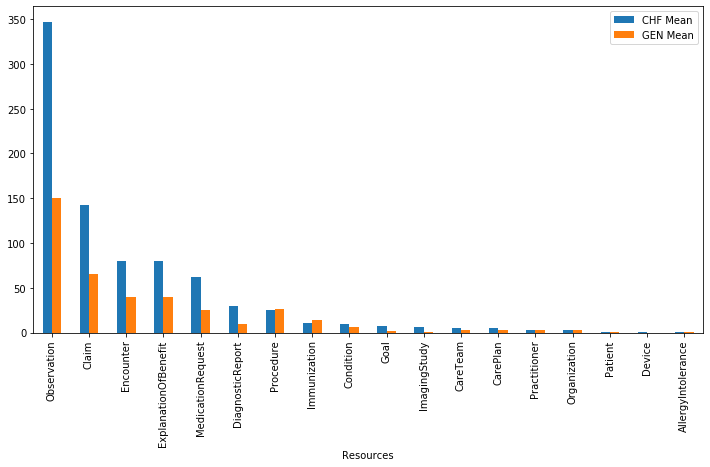

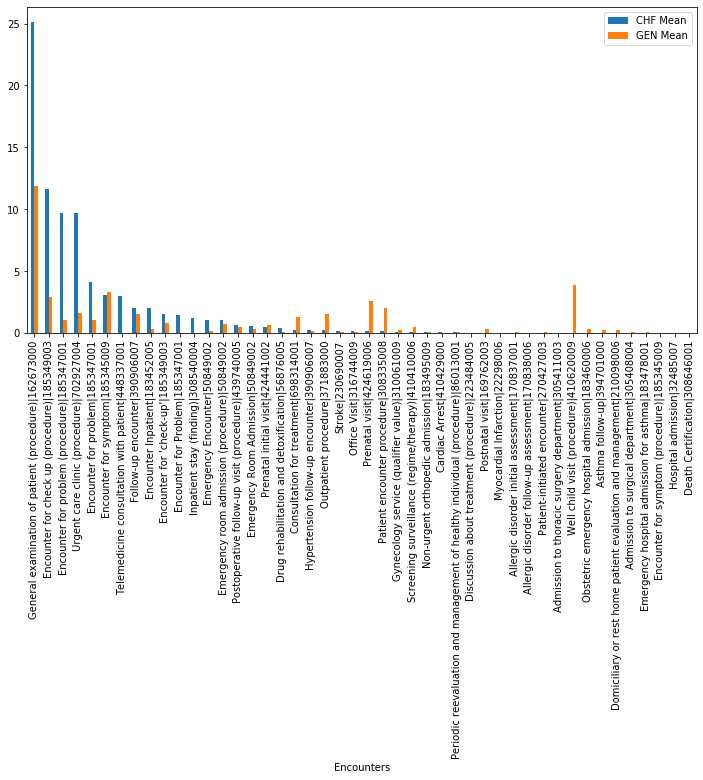

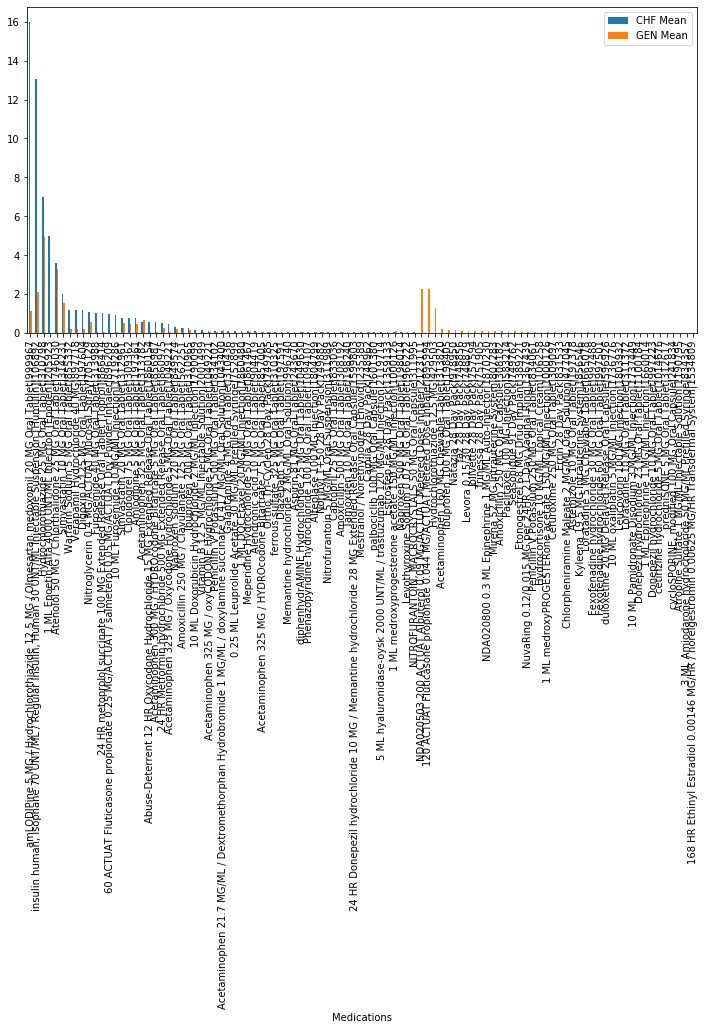

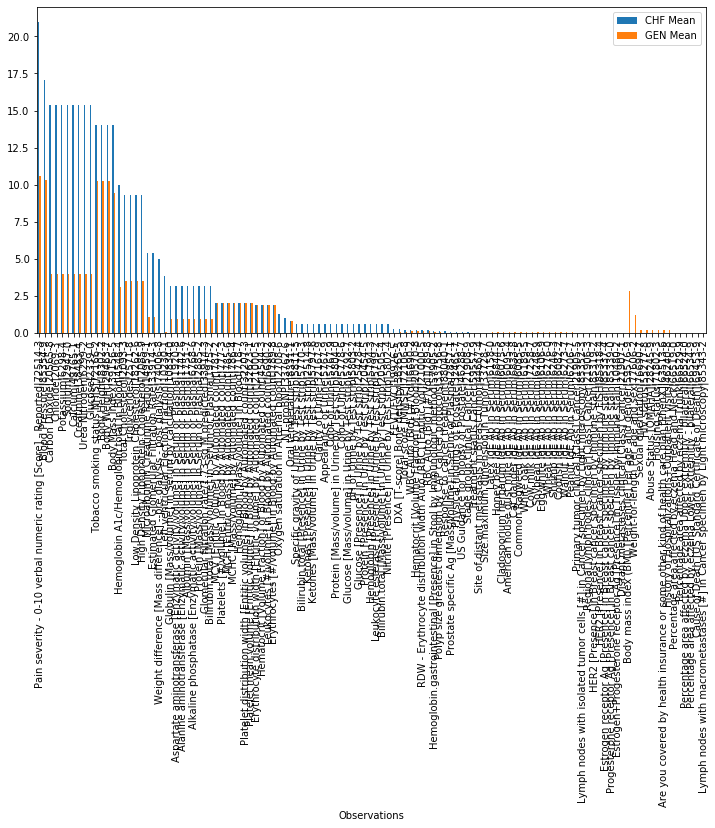

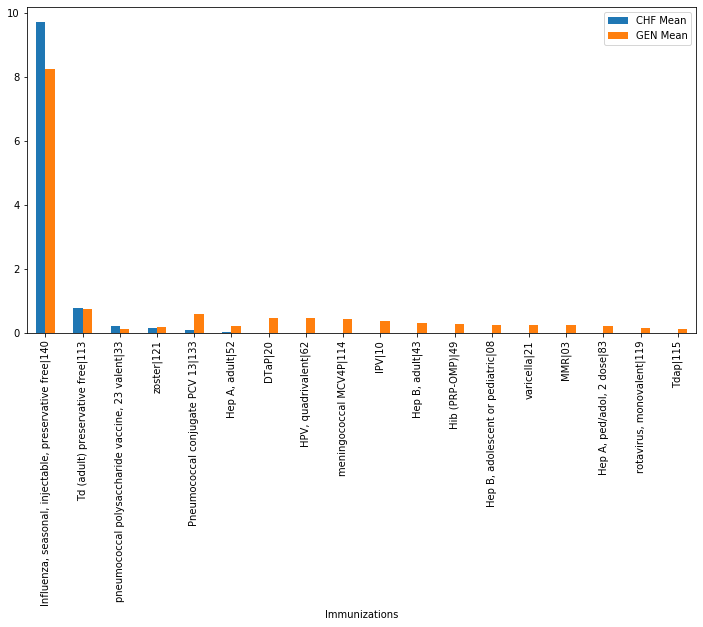

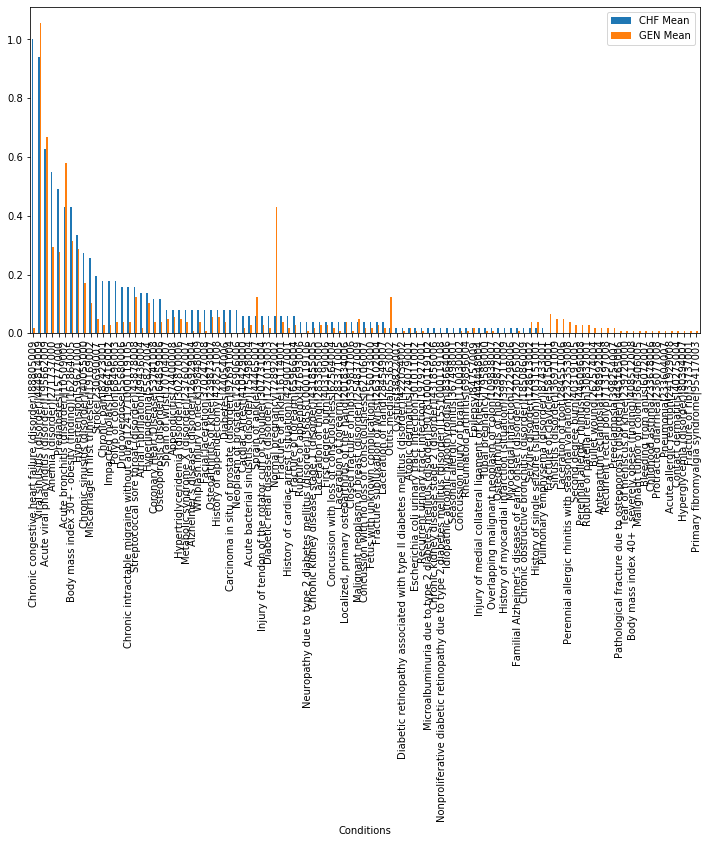

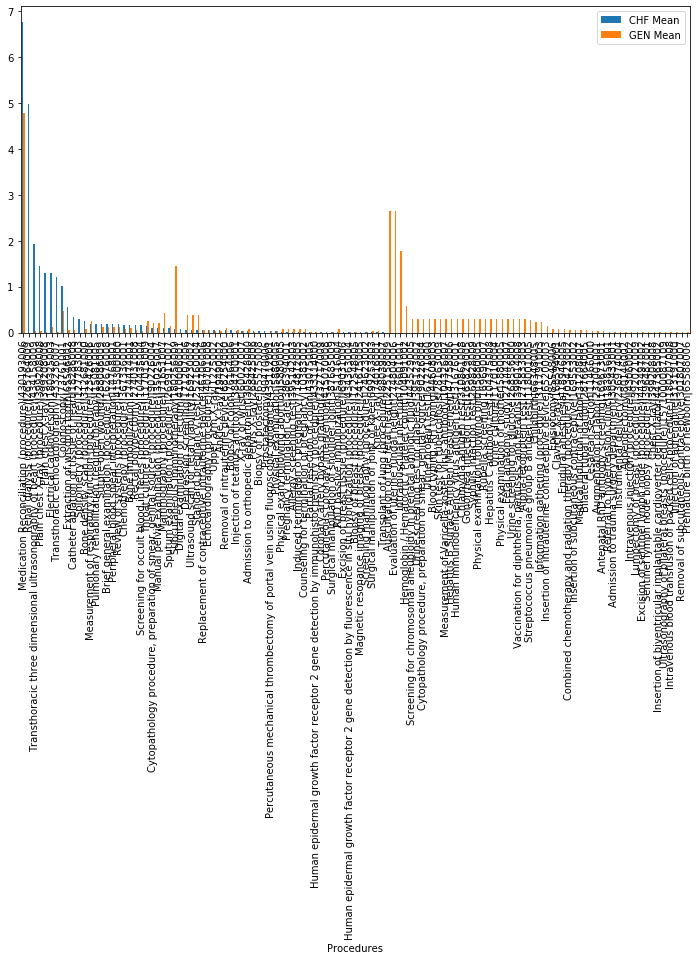

In [239]:

# Records frequency of resourceTypes and common resource codes
# Returns a 2D dictionary
medication_val = []
medication_date = []
def frequency_analysis(patient_data):
    dict_counter = defaultdict(Counter)
    
    for j in range(len(patient_data)):
        for i in range(patient_data[j]['entry'].count()):
            resource_type = patient_data[j]['entry'][i]['resource']['resourceType']
            dict_counter['Resources'][resource_type] += 1
            if resource_type == "MedicationRequest":
                code = patient_data[j]['entry'][i]['resource']['medicationCodeableConcept']['coding'][0]['code']
                display = patient_data[j]['entry'][i]['resource']['medicationCodeableConcept']['coding'][0]['display']
                dict_counter['Medications'][display+'|'+code] += 1
                medication_date.append(patient_data[j]['entry'][i]['resource']['authoredOn'])
                medication_val.append(dict_counter['Medications'][display+'|'+code])
                dict_counter['number_of_medications'][j] += 1
            elif resource_type == "Observation":
                code = patient_data[j]['entry'][i]['resource']['code']['coding'][0]['code']
                display = patient_data[j]['entry'][i]['resource']['code']['coding'][0]['display']
                dict_counter['Observations'][display+'|'+code] += 1    
            elif resource_type == "Procedure":
                code = patient_data[j]['entry'][i]['resource']['code']['coding'][0]['code']
                display = patient_data[j]['entry'][i]['resource']['code']['coding'][0]['display']
                dict_counter['Procedures'][display+'|'+code] += 1
            elif resource_type == "Patient":
                name = patient_data[j]['entry'][i]['resource']['name'][0]['given'][0]
                dict_counter['Patients'][name] += 1
            elif resource_type == "Condition":
                code = patient_data[j]['entry'][i]['resource']['code']['coding'][0]['code']
                display = patient_data[j]['entry'][i]['resource']['code']['coding'][0]['display']
                dict_counter['Conditions'][display+'|'+code] += 1
            elif resource_type == "Encounter":
                code = patient_data[j]['entry'][i]['resource']['type'][0]['coding'][0]['code']
                display = patient_data[j]['entry'][i]['resource']['type'][0]['coding'][0]['display']
                dict_counter['Encounters'][display+'|'+code] += 1
            elif resource_type == "Immunization":
                code = patient_data[j]['entry'][i]['resource']['vaccineCode']['coding'][0]['code']
                display = patient_data[j]['entry'][i]['resource']['vaccineCode']['coding'][0]['display']
                dict_counter['Immunizations'][display+'|'+code] += 1
    #Normalizing the frequencies
    number_of_patients = len(dict_counter['Patients'])
    for item in dict_counter['Observations']:
        dict_counter['Observations'][item] /= number_of_patients
    for item in dict_counter['Resources']:
        dict_counter['Resources'][item] /= number_of_patients
    for item in dict_counter['Encounters']:
        dict_counter['Encounters'][item] /= number_of_patients
    for item in dict_counter['Procedures']:
        dict_counter['Procedures'][item] /= number_of_patients
    for item in dict_counter['Medications']:
        dict_counter['Medications'][item] /= number_of_patients
    for item in dict_counter['Immunizations']:
        dict_counter['Immunizations'][item] /= number_of_patients
    for item in dict_counter['Conditions']:
        dict_counter['Conditions'][item] /= number_of_patients

    return dict_counter

onlychf_result = frequency_analysis(onlychf_data)
general_result = frequency_analysis(general_data)


# Construct DataFrames
df = []
totalDF = []
for sys_key, sys_dict in onlychf_result.items():
    totalDF.append(
        pd.DataFrame.from_dict(sys_dict, orient='index')
        .sort_values(by=[0], ascending=False).reset_index()
        .rename(columns={'index':sys_key, 0 : 'CHF Mean'})
    )
    
for sys_key, sys_dict in general_result.items():
    totalDF.append(
        pd.DataFrame.from_dict(sys_dict, orient='index')
        .sort_values(by=[0], ascending=False).reset_index()
        .rename(columns={'index':sys_key, 0 : 'GEN Mean'})
    )
    
#Finds frame within list of dataframes with same column name
#Returns the matching frame index or -1
def find_frame_index(df, column):
    index = -1
    i = 0
    for frame in df:
        if frame.columns.values[0] == column:
            index = i
        i += 1
    
    return index
            
#Merging the CHF and General population dataframes
for frame in totalDF[:len(totalDF)//2]:
    column = frame.columns.values[0]
    i = find_frame_index(totalDF, column)
    if i != -1:
        df.append(pd.merge(frame, totalDF[i], how='outer', on=column))
    else:
        df.append(frame) 

# Display
for frame in df:
    if frame.columns.values[0] != 'number_of_medications' and frame.columns.values[0] != 'Patients':
        display(frame)
        frame.plot.bar(x=frame.columns[0])

## Looking at the amount of medications given over time

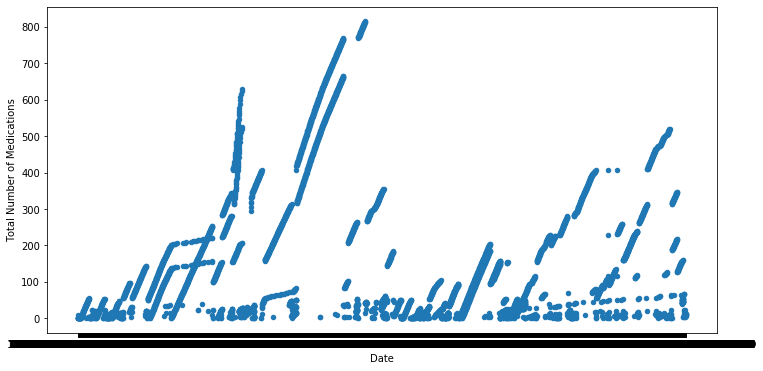

In [234]:
pd.DataFrame({'Date' : medication_date, "Total Number of Medications" : medication_val}).plot(x ='Date', y='Total Number of Medications', kind = 'scatter')

In [236]:
pd.DataFrame({'CHF Number of Medications' : list(onlychf_result['number_of_medications'].values())}).describe()

,CHF Number of Medications
count,51.000000
mean,62.509804
std,129.986518
min,3.000000
25%,5.500000
50%,22.000000
75%,60.000000
max,722.000000


In [235]:
pd.DataFrame({'General Pop Number of Medications' : list(general_result['number_of_medications'].values())}).describe()

,General Pop Number of Medications
count,101.000000
mean,26.693069
std,49.766604
min,1.000000
25%,3.000000
50%,6.000000
75%,33.000000
max,395.000000
